In [1]:
### This script simulates N-strain dynamics in the coinfection model (le TMT et al. 2021) when there is variation 
### in transmission rates and transmission probability from coinfected hosts between similar strains. Below, we simulate the replicator
### dynamics derived for this model on the slow time scale \epsilon t.

import numpy as np
from scipy import integrate
import scipy.integrate  as  ode
import matplotlib.pyplot  as  plt

np.set_printoptions(linewidth = 130, precision = 13)
%matplotlib inline

In [2]:
def repli(mu): #solve the solution for replicator
    #parameters
    m = beta/R0
    k = 1/(mu*(R0-1)) #mu: single to coinfection ratio

    #computation
    S_star = m/beta
    T_star = 1 - S_star
    I_star = m*T_star/(m + beta*k*T_star)
    J_star = T_star - I_star
    detP = -I_star*J_star + 2*(T_star)**2

    #weight of trait in replicator system
    teth1 = 2*beta*S_star*(T_star)**2/detP 
    teth4 = 2*m*T_star*J_star/detP

    lamd = np.zeros((n,n)) #n: number of strains
    for i in range (0, n):
        for j in range (0, n):
            lamd[i][j] = teth1*(b[i] - b[j]) +teth4*(omega[i,j] - omega[j,i]) #pairwise invasion fitnesses
        #replicator system
    def du_dt(u, t = 0):
        return u*(np.dot(lamd,u) - np.dot(np.dot(lamd,u),u))
        
    u, infodict = integrate.odeint(du_dt, u0, t, full_output = True)
    infodict['message']
    s = []
    for i in range(0, n):
        s.append(u.T[i])
    return s

In [3]:
### We define the parameter of the neutral model
n = 10
R0 = 2
gamma = 1.2
beta = 3
u0 = np.array([0.15, 0.08, 0.15, 0.18, 0.09, 0.08, 0.12, 0.05, 0.05, 0.05])

# variation in transmission rates beta_i
b = np.array([0.3, -0.8, 2.4, -0.5, 0.9, 2, 1.2, 1, -0.7, 0.5])
# variation in transmission probability p^i_{ij}
omega = np.array([[-3.,  0.,  3.,  2.,  1.,  2.,  4., -4., -1., -5.],
 [ 2.,  4.,  1., -4., -5.,  3., -5., -5.,  3., -1.],
 [ 4.,  0.,  1., -1., -2.,  4.,  4., -5.,  4., -4.],
 [ 0.,  3.,  3.,  0.,  12., -1.,  4.,  4., -3.,  1.],
 [ 1., -5.,  0.,  3., -2., -2., -4., -5., -3.,  1.],
 [ 0.,  0., -2.,  0.,  2.,  2., -3., -2.,  2., -5.],
 [ 3.,  1.,  0., -5., -2.,  1.,  1.,  1., -3., -4.],
 [-3., -4., -2.,  4.,  1., -3., -1.,  1., -2., -5.],
 [-5.,  2.,  3., -3., -2.,  2.,  4.,  1.,  3., -1.],
 [ 3.,  0., -5., -1., -4.,  3., -3., -4., -1.,  3.]])
        
t = np.linspace(0, 50, 500)

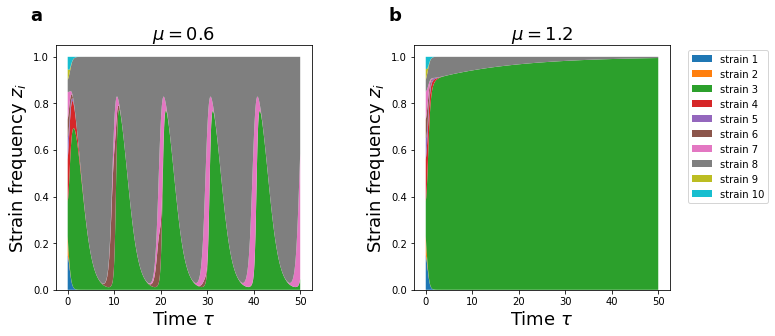

In [4]:
mu = np.array([0.6, 1.2]) #matrix of \mu values

labels = []
for i in range(0,n):
    labels.append('strain {}'.format(i+1))
    
order = np.array(['a', 'b'])

fig, ax = plt.subplots(1, 2, figsize = (11,4.5))
fig.subplots_adjust(wspace = 0.4)

for i in range (0,2):
    s = repli(mu[i])
    ax[i].stackplot(t, s, labels = labels)
    ax[i].set_xlabel("Time $\\tau$", fontsize = 18)
    ax[i].set_ylabel("Strain frequency $z_i$", fontsize = 18)
    ax[i].set_title('$\\mu = {}$'.format(mu[i]), fontsize = 18)
    ax[i].text(-0.1, 1.1, '{}'.format(order[i]), transform=ax[i].transAxes, size=18, weight='bold')

ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')